# Aplicación - Supervivencia en el Titanic

## Configuración del entorno

In [1]:
# Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Configuración de pandas
import pandas as pd
%matplotlib inline

data = pd.read_csv('titanic_processed.csv')
data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      0      0   7.8958           0           0   
1         1       3    0  26.0      0      0   7.9250           0           0   
2         0       3    1  27.0      0      0   7.8958           0           0   
3         0       2    1  32.0      2      0  73.5000           0           0   
4         0       3    1  65.0      0      0   7.7500           0           1   

   Embarked_S  
0           1  
1           1  
2           1  
3           1  
4           0

## Exploración 

In [2]:
data.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     0.404494    2.240169    0.636236   29.642093    0.514045    0.432584   
std      0.491139    0.836854    0.481420   14.492933    0.930692    0.854181   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   20.000000    0.000000    0.000000   
50%      0.000000    2.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   38.000000    1.000000    1.000000   
max      1.000000    3.000000    1.000000   80.000000    5.000000    6.000000   

             Fare  Embarked_C  Embarked_Q  Embarked_S  
count  712.000000  712.000000  712.000000  712.000000  
mean    34.567251    0.182584    0.039326    0.778090  
std     52.938648    0.386597    0.194506    0.415823  
min      0.000000    0.000000    0.000000    0.000000  
25%      8.050000    0.000000    0.000000    1.000000  
50%     15.645850    0.000000    0.000000    1.000000  
75%     33.000000    0.000000    0.000000    1.000000  
max    512.329200    1.000000    1.000000    1.000000

In [3]:
data.tail()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
707         0       3    1  22.0      0      0   8.0500           0   
708         1       1    1  35.0      0      0  26.2875           0   
709         0       3    1  21.0      0      0   8.4333           0   
710         0       3    1  25.0      0      0   7.2250           1   
711         0       3    1  22.0      0      0   9.0000           0   

     Embarked_Q  Embarked_S  
707           0           1  
708           0           1  
709           0           1  
710           0           0  
711           0           1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Sex         712 non-null    int64  
 3   Age         712 non-null    float64
 4   SibSp       712 non-null    int64  
 5   Parch       712 non-null    int64  
 6   Fare        712 non-null    float64
 7   Embarked_C  712 non-null    int64  
 8   Embarked_Q  712 non-null    int64  
 9   Embarked_S  712 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 55.8 KB


C:\Users\sebas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sebas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sebas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sebas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

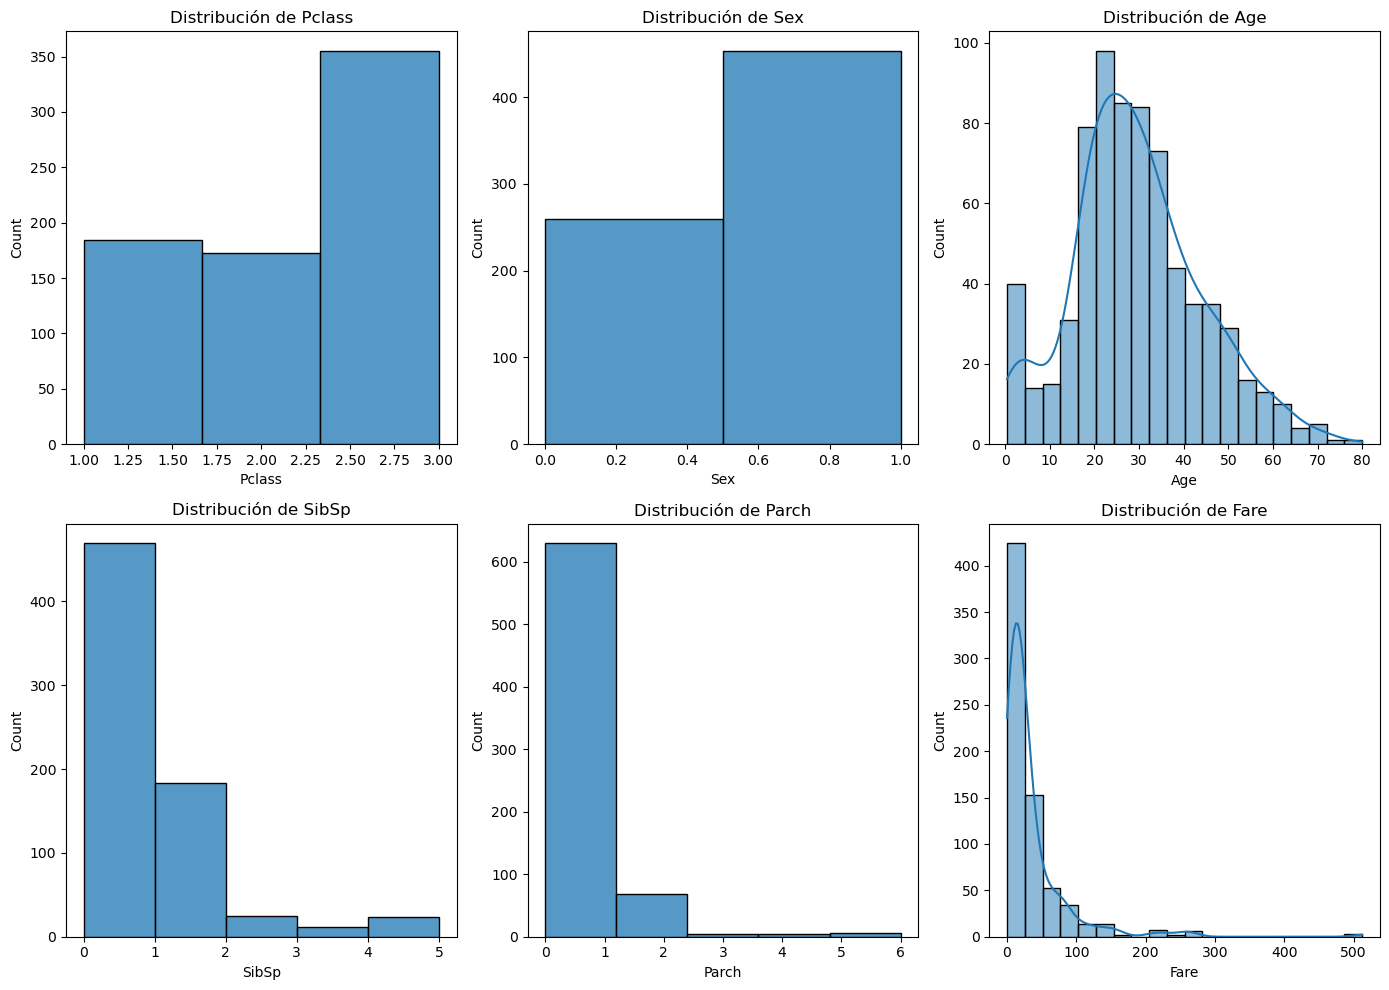

In [5]:
# Gráficos de distribución
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.histplot(data['Pclass'], kde=False, bins=3)
plt.title('Distribución de Pclass')

plt.subplot(2, 3, 2)
sns.histplot(data['Sex'], kde=False, bins=2)
plt.title('Distribución de Sex')

plt.subplot(2, 3, 3)
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Distribución de Age')

plt.subplot(2, 3, 4)
sns.histplot(data['SibSp'], kde=False, bins=5)
plt.title('Distribución de SibSp')

plt.subplot(2, 3, 5)
sns.histplot(data['Parch'], kde=False, bins=5)
plt.title('Distribución de Parch')

plt.subplot(2, 3, 6)
sns.histplot(data['Fare'], kde=True, bins=20)
plt.title('Distribución de Fare')

plt.tight_layout()
plt.show()

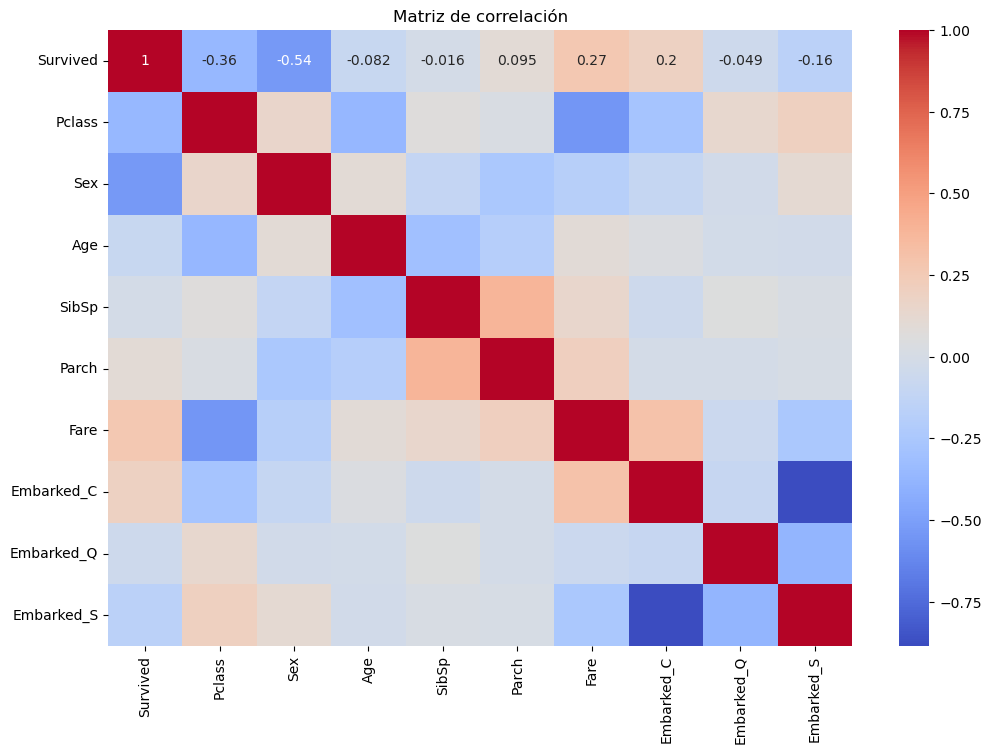

In [6]:
# Gráfico de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

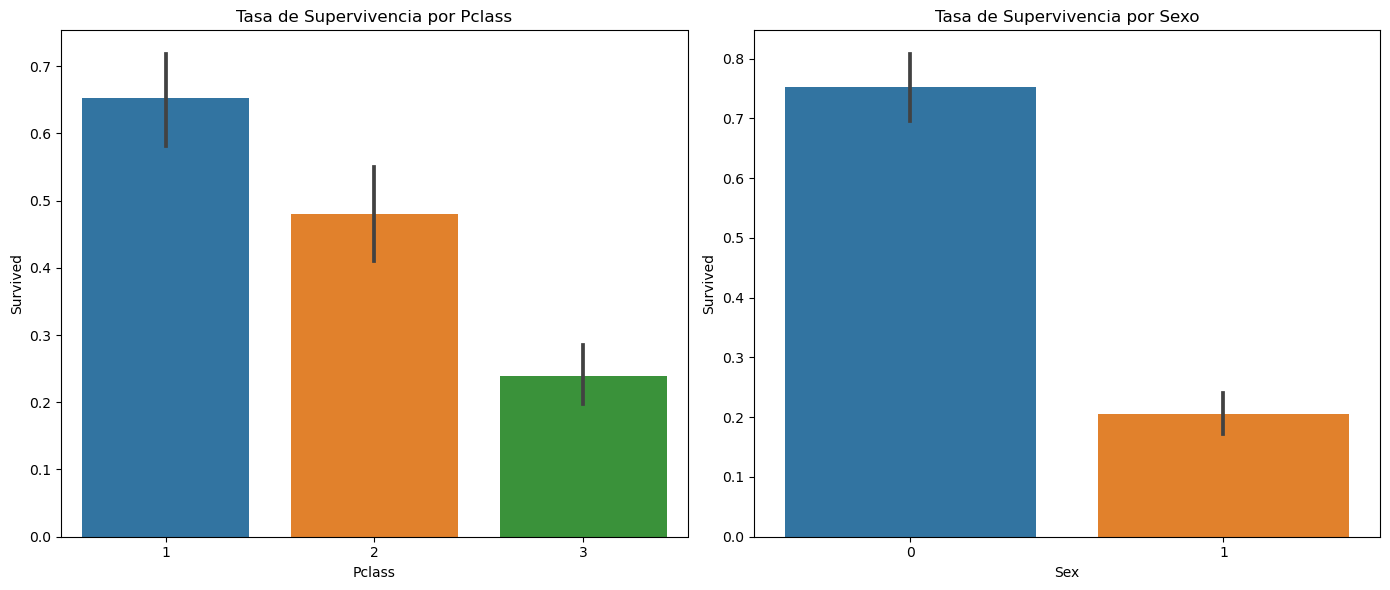

In [7]:
# Gráfico de Supervivencia por clase y sexo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Tasa de Supervivencia por Pclass')

plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Tasa de Supervivencia por Sexo')

plt.tight_layout()
plt.show()

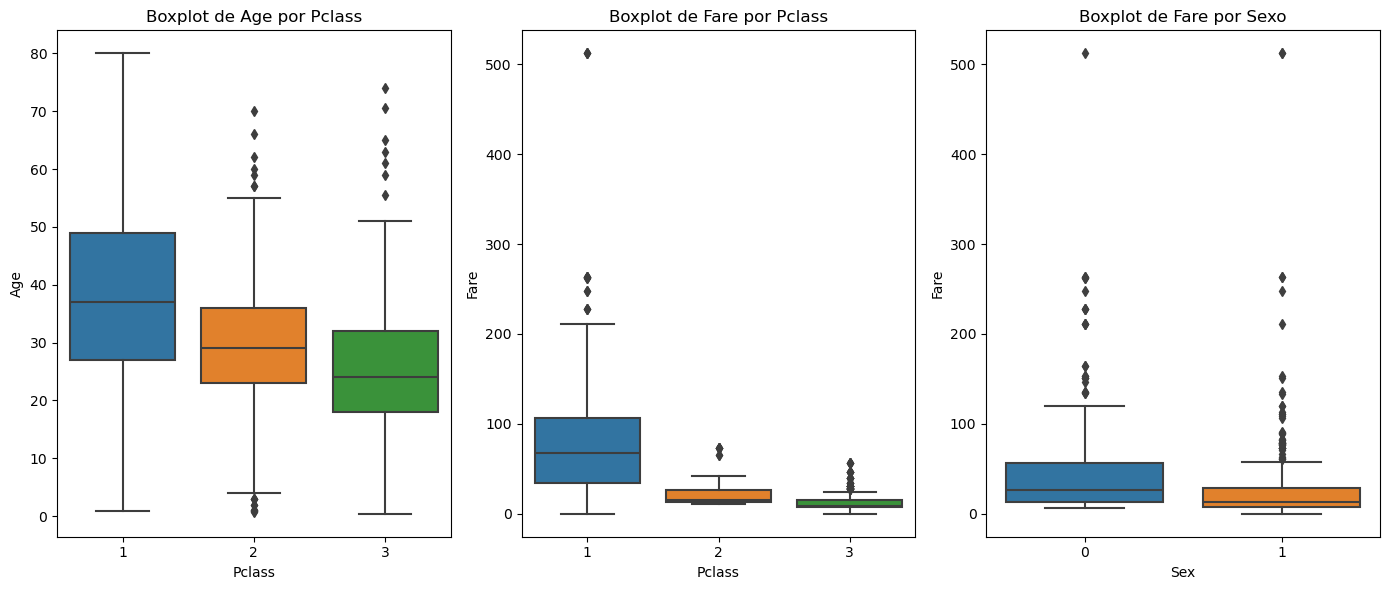

In [8]:
# Análisis de Outliers o Valores Atípicos
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Boxplot de Age por Pclass')

plt.subplot(1, 3, 2)
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Boxplot de Fare por Pclass')

plt.subplot(1, 3, 3)
sns.boxplot(x='Sex', y='Fare', data=data)
plt.title('Boxplot de Fare por Sexo')

plt.tight_layout()
plt.show()

## Modelo de regresion logistica

In [9]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy del modelo de regresión logística: {accuracy_logistic:.2f}")

Accuracy del modelo de regresión logística: 0.83


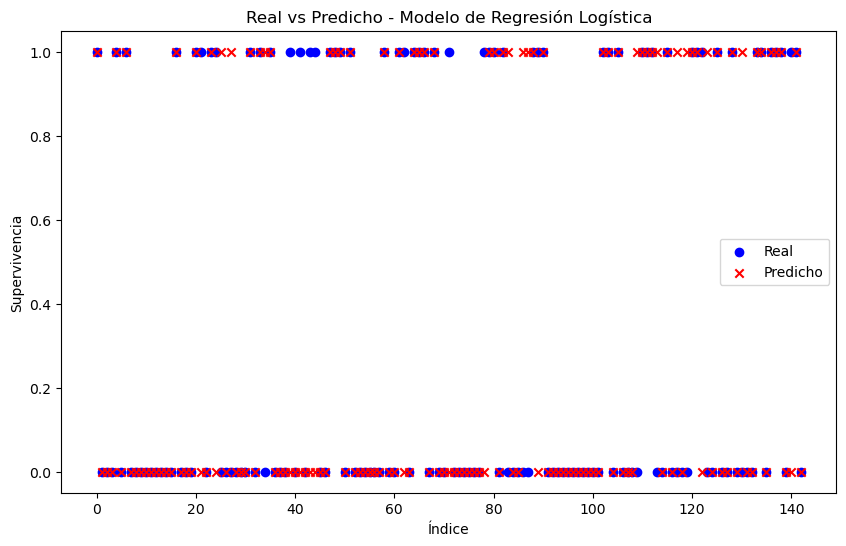

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Real', marker='o', color='blue')
plt.scatter(range(len(y_pred_logistic)), y_pred_logistic, label='Predicho', marker='x', color='red')
plt.xlabel('Índice')
plt.ylabel('Supervivencia')
plt.legend()
plt.title('Real vs Predicho - Modelo de Regresión Logística')
plt.show()

## Modelo de Arbol de Desición (Clasificación)

In [13]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy del modelo de árbol de decisión: {accuracy_tree:.2f}")

Accuracy del modelo de árbol de decisión: 0.80


In [15]:
plt.figure(figsize=(20, 10), dpi=800)
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['No Sobrevivió', 'Sobrevivió'], filled=True)
plt.title('Árbol de Decisión - Supervivencia del Titanic')
plt.show()

## Comparación de diferentes modelos

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Entrenar y evaluar varios modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.83
Decision Tree Accuracy: 0.80
K-Nearest Neighbors Accuracy: 0.68
Random Forest Accuracy: 0.80
Support Vector Machine Accuracy: 0.69


## Conclusión

En este ejercicio, se desarrollaron dos modelos de clasificación para predecir la supervivencia de los pasajeros del Titanic utilizando un conjunto de datos procesado. Primero, se implementó un modelo de regresión logística, que logró una precisión satisfactoria en el conjunto de prueba, cercana al 83%. Este modelo fue evaluado mediante la precisión y visualizado a través de un gráfico de dispersión, mostrando un buen rendimiento general.

Luego, se desarrolló un modelo de árbol de decisión, que también alcanzó una precisión comparable de 80%. Este modelo fue visualizado con un gráfico del árbol, proporcionando una interpretación clara de cómo las diferentes características influyen en la predicción de la supervivencia.

Ambos enfoques demostraron ser efectivos para la tarea de clasificación. Este ejercicio ilustra la importancia de probar diferentes modelos y técnicas para encontrar la mejor solución posible para un problema de clasificación